1. Відкрити та зчитати наданий файл з даними.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,  AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("ЛР5-пгр2.csv", sep=';')

2. Визначити та вивести кількість записів.

In [3]:
df.shape

(1599, 12)

3. Видалити атрибут quality.

In [4]:
df = df.drop(columns=['quality'])

4. Вивести атрибути, що залишилися.

In [5]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

5. Використовуючи функцію KMeans бібліотеки scikit-learn, виконати
розбиття набору даних на кластери з випадковою початковою
ініціалізацією і вивести координати центрів кластерів.
Оптимальну кількість кластерів визначити на основі початкового
набору даних трьома різними способами:
1) elbow method;
2) average silhouette method;
3) prediction  strength  method.
Отримані  результати  порівняти  і  пояснити,  який  метод  дав  кращий 
результат і чому так (на Вашу думку).

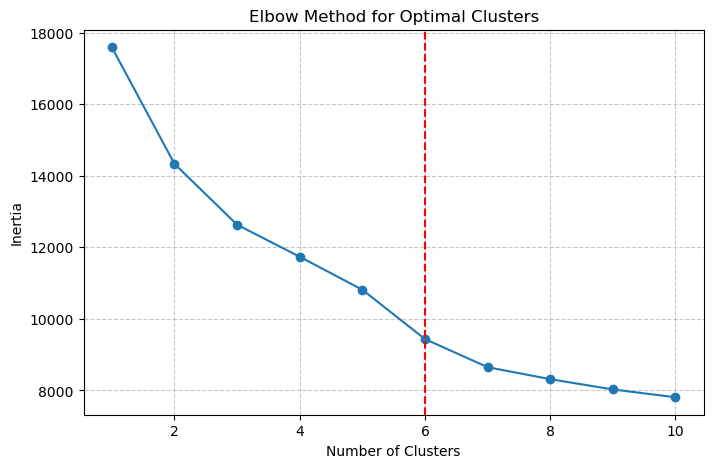

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

kl = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
optimal_k = kl.elbow

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.show()


For n_clusters = 2, The average silhouette_score is: 0.3987563620352925


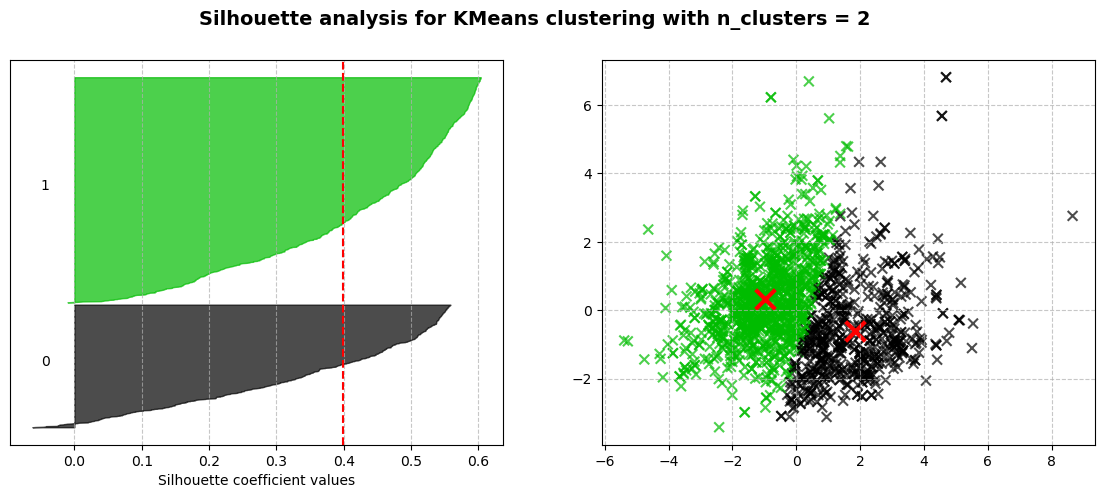

For n_clusters = 3, The average silhouette_score is: 0.37815958192954724


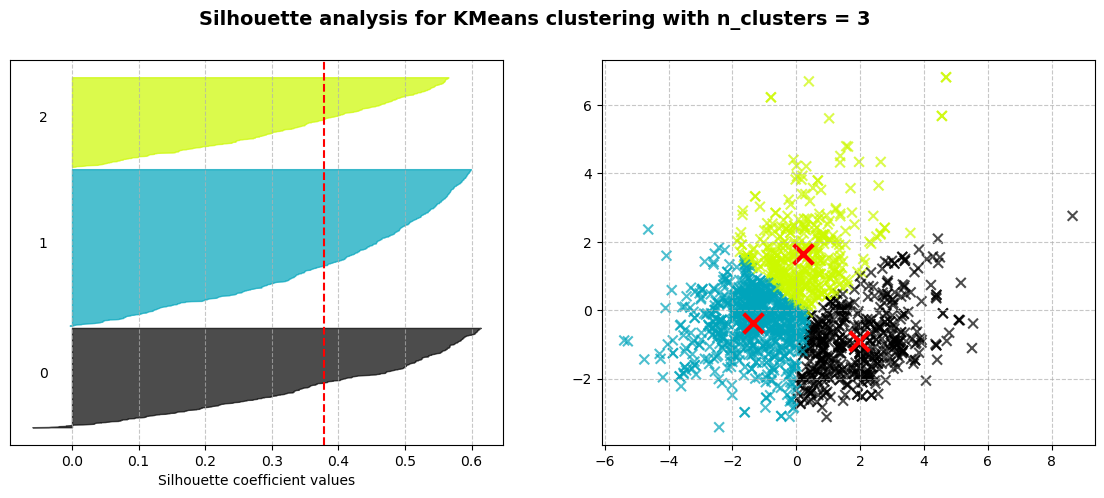

For n_clusters = 4, The average silhouette_score is: 0.3676889275256256


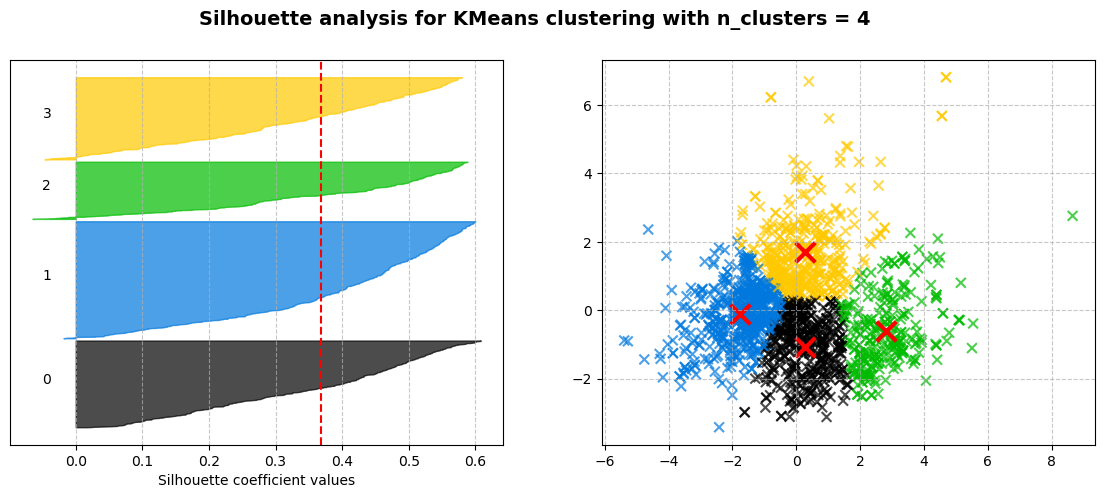

For n_clusters = 5, The average silhouette_score is: 0.3335141413132016


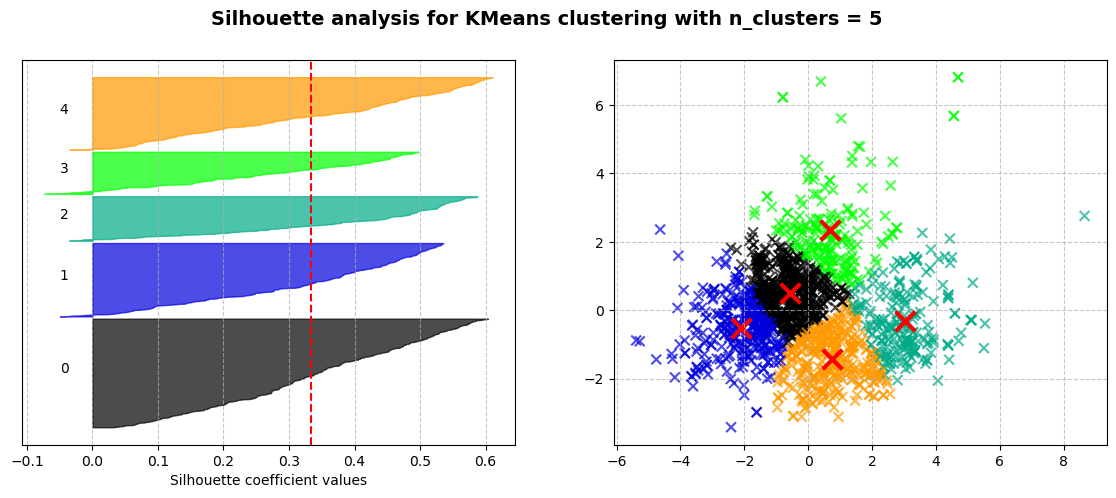

For n_clusters = 6, The average silhouette_score is: 0.33522558138643166


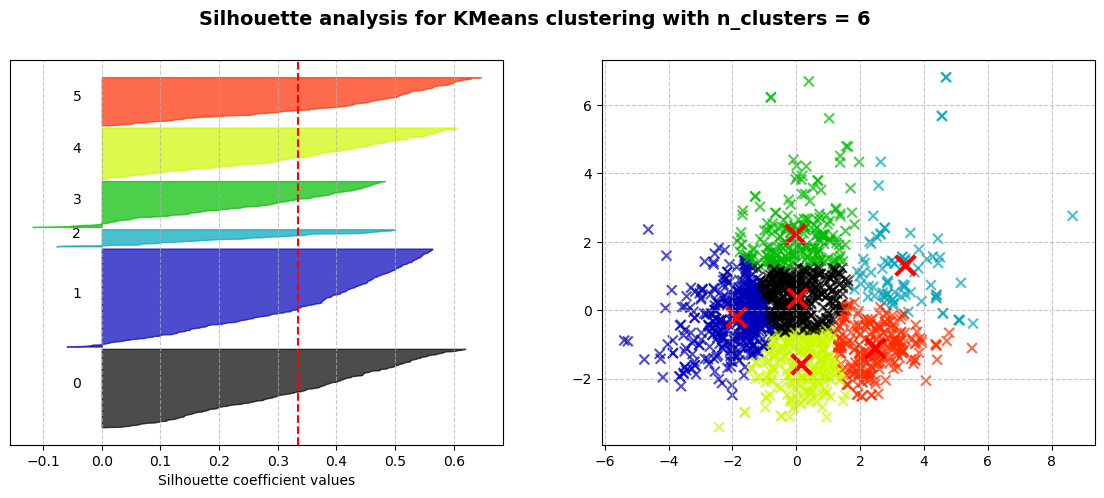

For n_clusters = 7, The average silhouette_score is: 0.33654074513274657


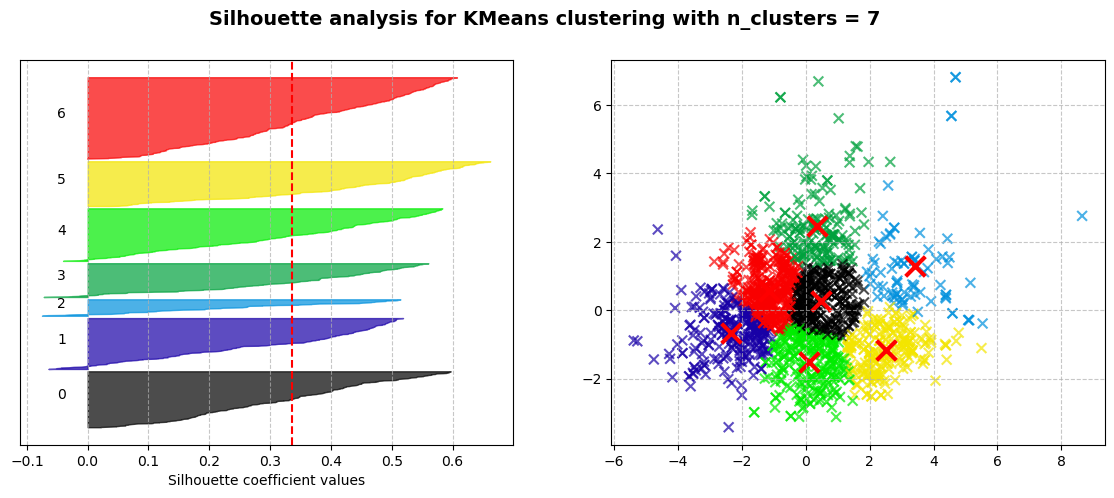

For n_clusters = 8, The average silhouette_score is: 0.3371390241440053


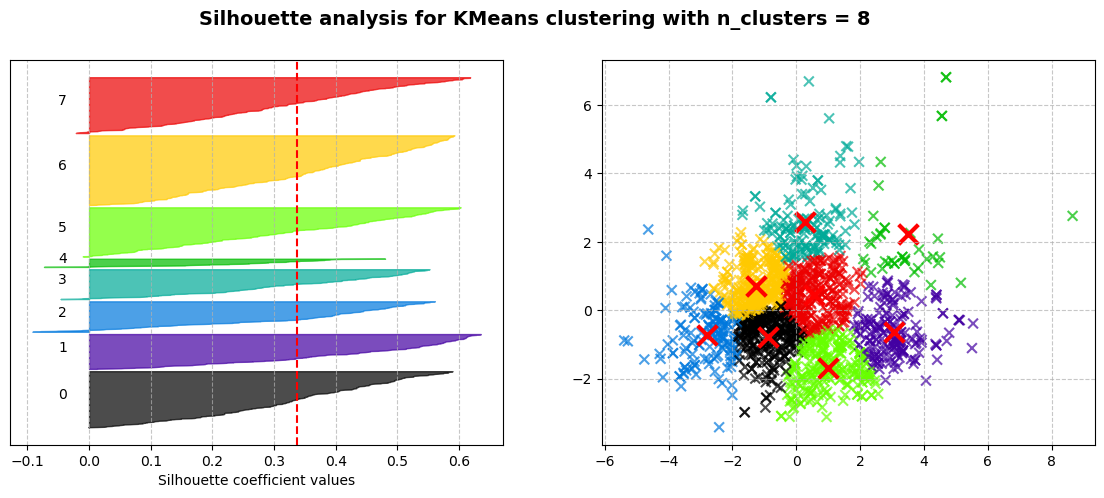

For n_clusters = 9, The average silhouette_score is: 0.3260982769697101


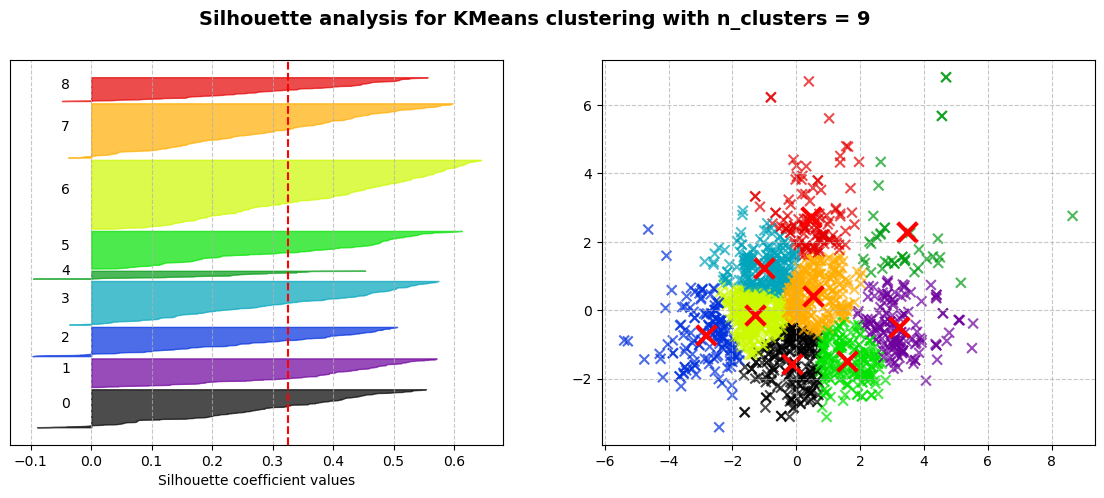

For n_clusters = 10, The average silhouette_score is: 0.332069387791504


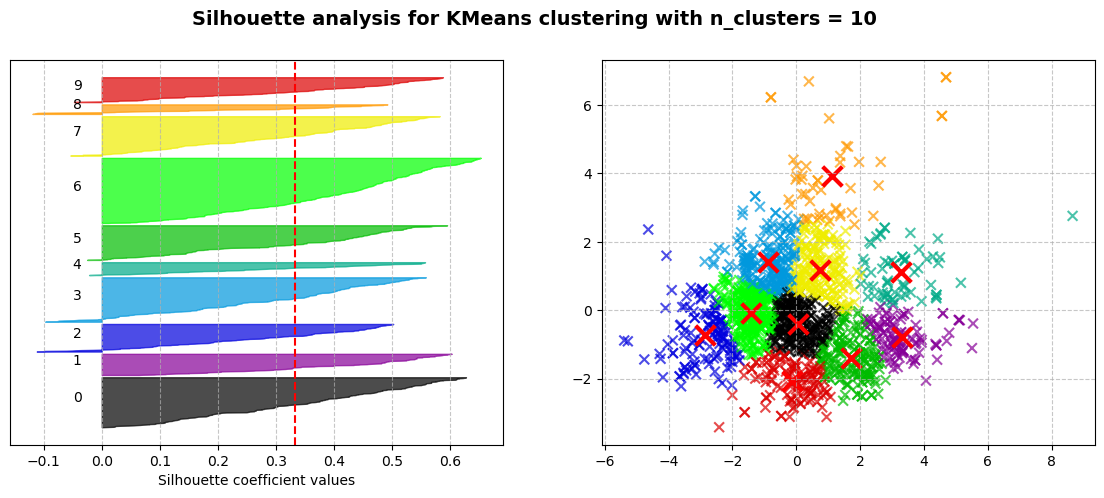

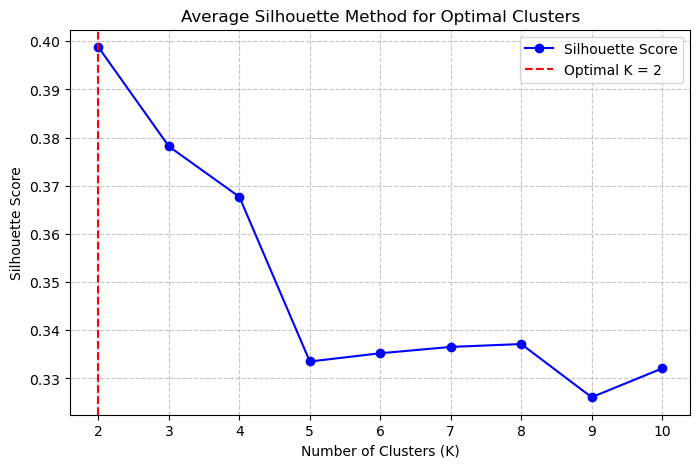

In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

cluster_range = range(2, 11)
silhouette_avgs = [] 

for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_avgs.append(silhouette_avg) 
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_xlabel("Silhouette coefficient values")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.grid(axis='both', linestyle='--', alpha=0.7)

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker="x", s=50, alpha=0.7, c=colors)

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="x", c="red", s=200, linewidths=3)
    ax2.grid(axis='both', linestyle='--', alpha=0.7)

    plt.suptitle((f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}"), fontsize=14, fontweight="bold")
    plt.show()

max_silhouette = max(silhouette_avgs)
optimal_k = cluster_range[silhouette_avgs.index(max_silhouette)]

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_avgs, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('Average Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

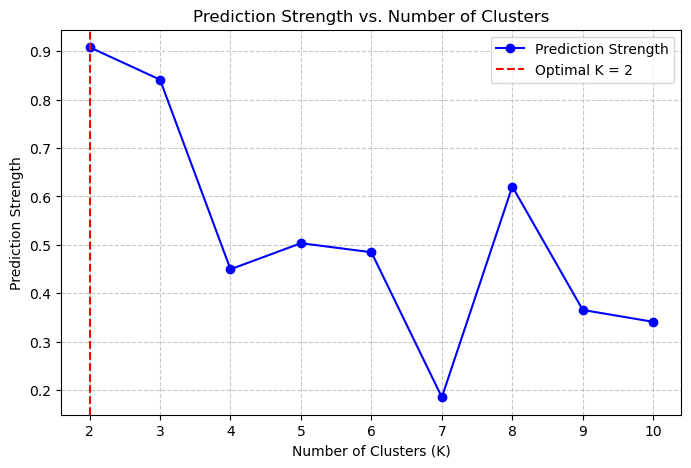

: 

In [ ]:
def prediction_strength(X, k, test_size=1/3, random_state=42):
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)

    kmeans_train = KMeans(n_clusters=k, random_state=random_state).fit(X_train)
    kmeans_test = KMeans(n_clusters=k, random_state=random_state).fit(X_test)

    labels_train = kmeans_train.predict(X_test) 
    labels_test = kmeans_test.predict(X_test)  

    strengths = []
    for i in range(k):
        idx = np.where(labels_train == i)[0]
        if len(idx) <= 1:
            continue

        pairs = [(idx[m], idx[n]) for m in range(len(idx)) for n in range(m+1, len(idx))]
        agree = sum(1 for m, n in pairs if labels_test[m] == labels_test[n])
        strengths.append(agree / len(pairs) if len(pairs) > 0 else 0)

    return min(strengths)

cluster_range = range(2, 11)
strengths = [prediction_strength(df_scaled, k) for k in cluster_range]

optimal_k = cluster_range[np.argmax(strengths)]

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, strengths, marker='o', linestyle='-', color='blue', label='Prediction Strength')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')  # Вертикальна лінія на оптимальному K
plt.title('Prediction Strength vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Prediction Strength')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

6. За раніш обраної кількості кластерів багаторазово проведіть
кластеризацію методом k-середніх, використовуючи для початкової
ініціалізації метод k-means++.
Виберіть  найкращий  варіант  кластеризації.  Який  кількісний  критерій
Ви обрали для відбору найкращої кластеризації?


Середній силуетний коефіцієнт: 0.2188284638653328
Найкращий силуетний коефіцієнт: 0.4801343615570164 на запуску 29
Стандартне відхилення: 0.04861776530755406


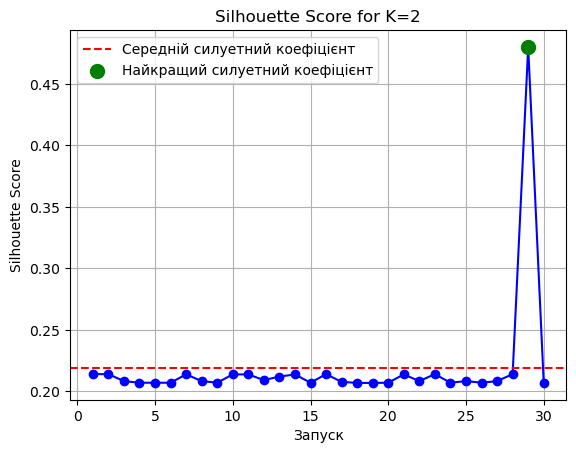

In [29]:
n_runs = 30
k = 2
silhouette_scores = []

best_silhouette = -1
best_run = -1

for i in range(n_runs):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=i)
    labels = kmeans.fit_predict(df_scaled)
    silhouette = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette)

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_run = i

print(f"Середній силуетний коефіцієнт: {np.mean(silhouette_scores)}")
print(f"Найкращий силуетний коефіцієнт: {best_silhouette} на запуску {best_run+1}")
print(f"Стандартне відхилення: {np.std(silhouette_scores)}")

plt.plot(range(1, n_runs + 1), silhouette_scores, 'o-', color='blue')
plt.axhline(y=np.mean(silhouette_scores), color='red', linestyle='--', label='Середній силуетний коефіцієнт')
plt.scatter([best_run + 1], [best_silhouette], color='green', s=100, label='Найкращий силуетний коефіцієнт', zorder=5)
plt.title(f'Silhouette Score for K={k}')
plt.xlabel('Запуск')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

Середній силуетний коефіцієнт: 0.1785037374593538
Найкращий силуетний коефіцієнт: 0.19447645834423016 на запуску 12
Стандартне відхилення: 0.015392312185306688


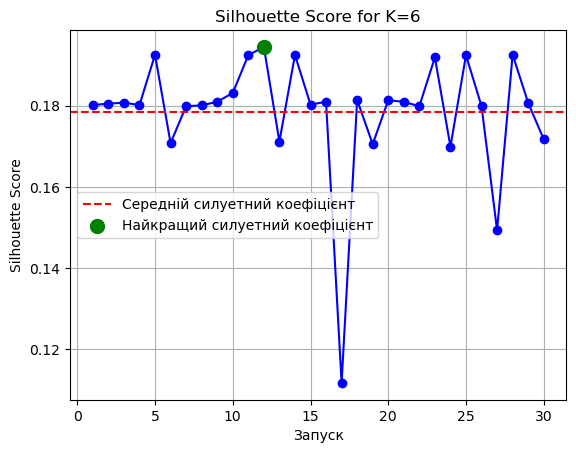

In [28]:
n_runs = 30
k = 6
silhouette_scores = []

best_silhouette = -1
best_run = -1

for i in range(n_runs):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=i)
    labels = kmeans.fit_predict(df_scaled)
    silhouette = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette)

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_run = i

print(f"Середній силуетний коефіцієнт: {np.mean(silhouette_scores)}")
print(f"Найкращий силуетний коефіцієнт: {best_silhouette} на запуску {best_run+1}")
print(f"Стандартне відхилення: {np.std(silhouette_scores)}")

plt.plot(range(1, n_runs + 1), silhouette_scores, 'o-', color='blue')
plt.axhline(y=np.mean(silhouette_scores), color='red', linestyle='--', label='Середній силуетний коефіцієнт')
plt.scatter([best_run + 1], [best_silhouette], color='green', s=100, label='Найкращий силуетний коефіцієнт', zorder=5)
plt.title(f'Silhouette Score for K={k}')
plt.xlabel('Запуск')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

7. Використовуючи функцію AgglomerativeClustering бібліотеки scikit-
learn, виконати розбиття набору даних на кластери. Кількість кластерів
обрати такою ж самою, як і в попередньому методі. Вивести
координати центрів кластерів.

In [46]:
k = 2
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agg_clustering.fit_predict(df_scaled)

centroids = []
for i in range(k):
    cluster_points = df_scaled[labels == i]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

print("Координати центрів кластерів (K=2):\n")
for i, centroid in enumerate(centroids):
    print(f"Центр кластера {i+1}: \n{centroid}")

Координати центрів кластерів (K=2):

Центр кластера 1: 
[-0.33671193  0.33282136 -0.42987265  0.01367412 -0.10956403  0.24047937
  0.24867327 -0.08468829  0.2637072  -0.20807042 -0.18530765]
Центр кластера 2: 
[ 0.77339607 -0.76445977  0.98737758 -0.03140818  0.25165841 -0.5523588
 -0.57117942  0.19452115 -0.60571097  0.47791845  0.42563447]


In [48]:
k = 6
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_6 = agg_clustering.fit_predict(df_scaled)

centroids_6 = []
for i in range(k):
    cluster_points = df_scaled[labels_6 == i]
    centroid = cluster_points.mean(axis=0)
    centroids_6.append(centroid)

centroids_6 = np.array(centroids_6)

print("Координати центрів кластерів (K=6):\n")
for i, centroid in enumerate(centroids_6):
    print(f"Центр кластера {i+1}: \n{centroid}")

Координати центрів кластерів (K=6):

Центр кластера 1: 
[-0.0051223  -0.0630978   0.08763279  0.29392768 -0.04519254  1.03047829
  0.99547803  0.23563272 -0.11635848  0.053511   -0.32323909]
Центр кластера 2: 
[-0.45410426  0.6856623  -0.80452681 -0.17779372 -0.08546671 -0.44715658
 -0.3732804  -0.07433188  0.36601816 -0.44960044 -0.40513055]
Центр кластера 3: 
[ 0.30075634 -0.94230889  0.7718426  -0.08611239 -0.17273095 -0.55158758
 -0.63514457 -0.29674946 -0.2400308   0.36680739  0.72678087]
Центр кластера 4: 
[ 1.94155948e-01  1.17198809e-03  1.16515830e+00 -3.50021617e-01
  5.57981313e+00 -3.18399512e-01 -4.55555339e-02  4.01197677e-01
 -1.30895858e+00  2.27666874e+00 -9.54557183e-01]
Центр кластера 5: 
[-1.33270223  0.38347884 -0.95940223 -0.33425544 -0.55392515  0.05156598
 -0.08026476 -1.7093811   1.57791978 -0.19651566  1.66724674]
Центр кластера 6: 
[ 2.16274099 -0.50133327  1.50428298  0.195812   -0.04477185 -0.61614156
 -0.5426113   1.42512246 -1.37667293  0.29371491  0.0022

8. Порівняти результати двох використаних методів кластеризації.

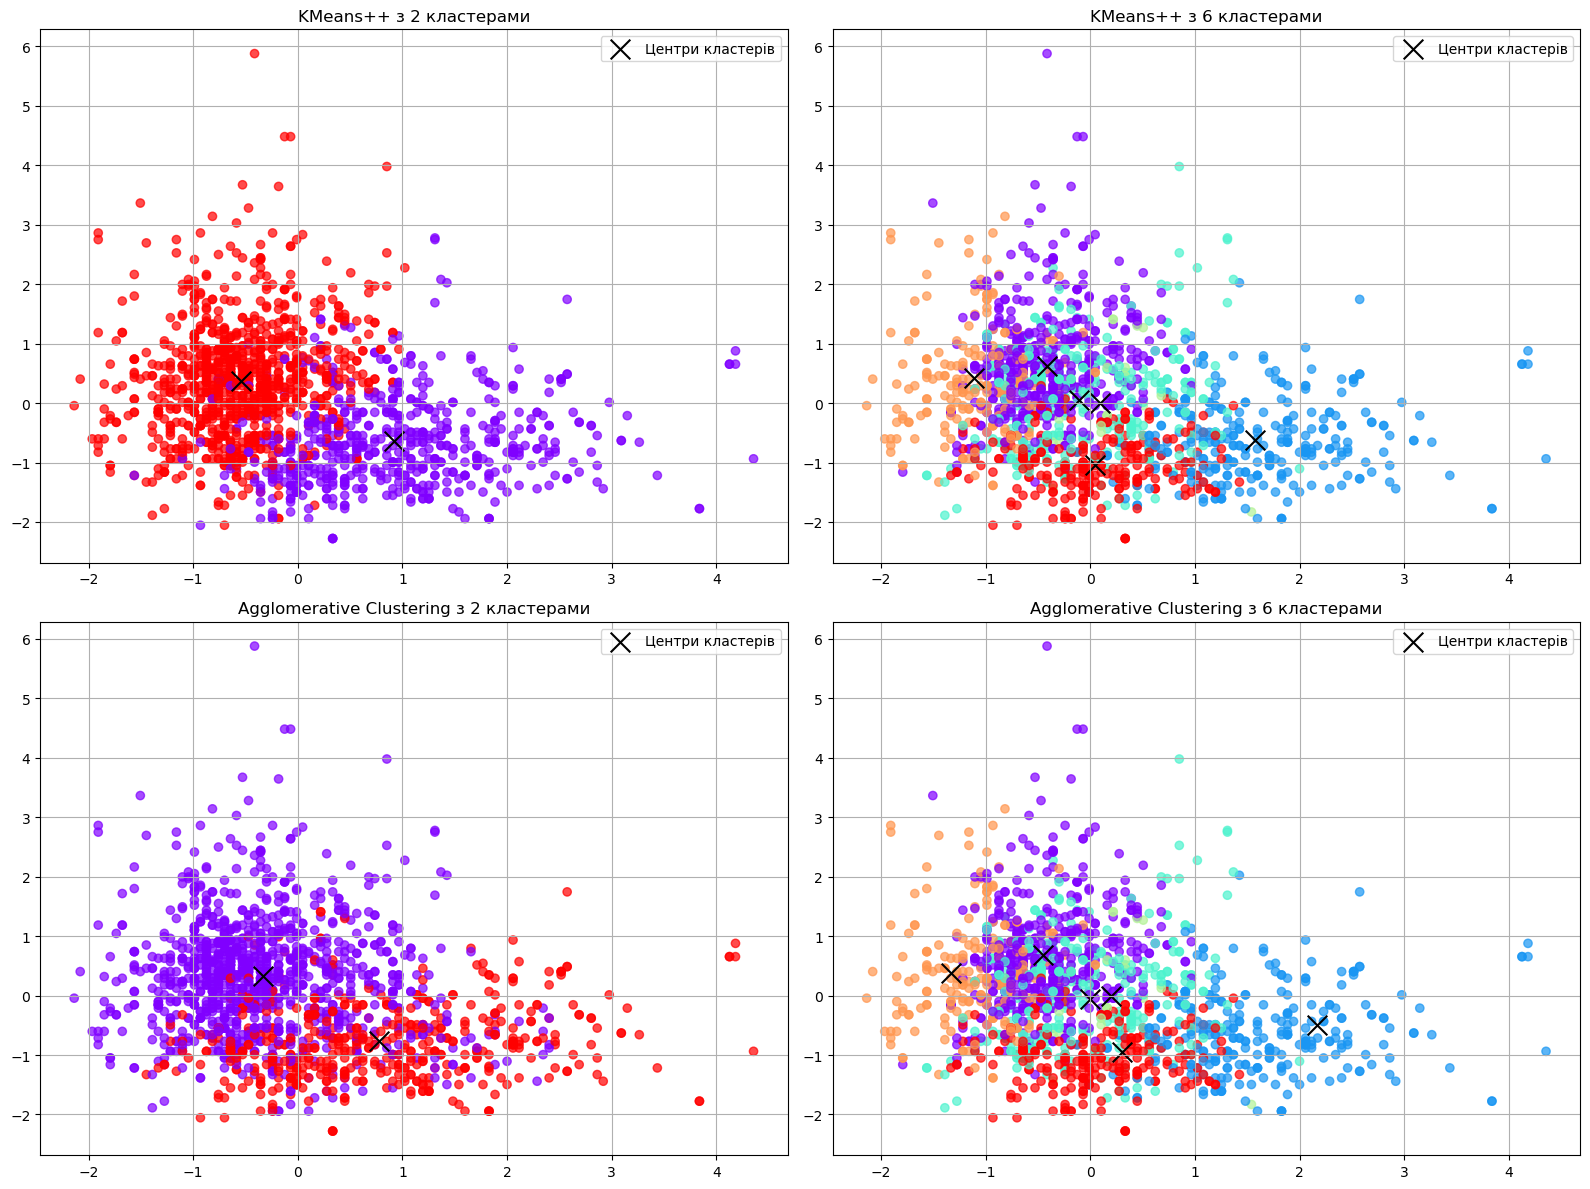

In [50]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels_2 = kmeans_2.fit_predict(df_scaled)
centers_2 = kmeans_2.cluster_centers_

kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=42)
labels_6 = kmeans_6.fit_predict(df_scaled)
centers_6 = kmeans_6.cluster_centers_

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax = axes[0, 0]
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_2, cmap='rainbow', alpha=0.7, marker='o')
ax.scatter(centers_2[:, 0], centers_2[:, 1], c='black', marker='x', s=200, label="Центри кластерів")
ax.set_title('KMeans++ з 2 кластерами')
ax.legend()
ax.grid(True)

ax = axes[0, 1]
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_6, cmap='rainbow', alpha=0.7, marker='o')
ax.scatter(centers_6[:, 0], centers_6[:, 1], c='black', marker='x', s=200, label="Центри кластерів")
ax.set_title('KMeans++ з 6 кластерами')
ax.legend()
ax.grid(True)

ax = axes[1, 0]
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='rainbow', alpha=0.7, marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label="Центри кластерів")
ax.set_title('Agglomerative Clustering з 2 кластерами')
ax.legend()
ax.grid(True)

ax = axes[1, 1]
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_6, cmap='rainbow', alpha=0.7, marker='o')
ax.scatter(centroids_6[:, 0], centroids_6[:, 1], c='black', marker='x', s=200, label="Центри кластерів")
ax.set_title('Agglomerative Clustering з 6 кластерами')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
